<a href="https://colab.research.google.com/github/luis314159/Algo_stanford/blob/master/IIR_Pasa_Banda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en ingeniería en computación 
##<center>Procesamiento de señales
##<center>Trabajo: Filtro dijital IIR pasa banda  
###<center>Catedrático: Dr. Alain Manzo Martínez 
###<center>Estudiante:Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

In [ ]:
#@title Filtro pasa banda 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para poder usar el método de "transformación de un prototipo" se debera tener con prototipo como dice el nombre del método, el cual debe de contar con las siguientes características:


*   Ser un filtro pasa bajas 
*   $w_c=1 rad/s$

<center>
<img src="https://repositorio.innovacionumh.es/Proyectos/P_19/Tema_5/images/pic075.jpg" width="300" height="150" />
</center>


Ecuación del filtro pasa bajas:
 
<center>

$H(s)_{LP}=\dfrac{1}{1+s}$
<center>

Después se transforma, evaluando $s$ para el valor del filtro que se desea aplicar, en este caso
<center>
 $s=\dfrac{s^2+ω_0^2}{Bs}$
<center>


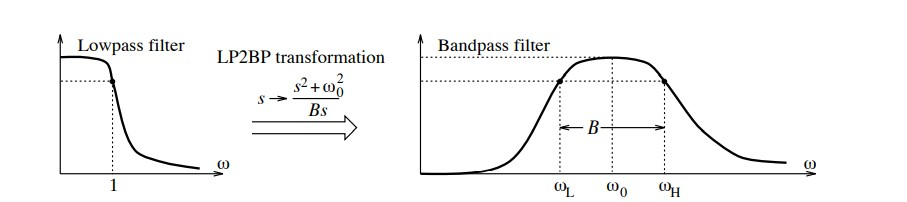

In [ ]:
#@title Transformación de filtro 

from IPython.display import Image 
Image("/content/drive/MyDrive/procesamiento/Unidad3/Trans.jpg")



<center>
$LP2BP=\left.\dfrac{1}{1+s}\right|_{s=\dfrac{s^2+ω_0^2}{Bs}}=\dfrac{1}{1+\dfrac{s^2+ω_0^2}{Bs}}=\dfrac{Bs}{s^2+Bs+ω_0^2}$
<center>


A continuación se obtendra el programa de un filtro pasa banda por el método de

 "transformación de prototipos" con:
<center>
  $Q=20$ y $f_0 = 1800 hz$
<center>

Text(0.5, 0, 'Frecuencia en Hz')

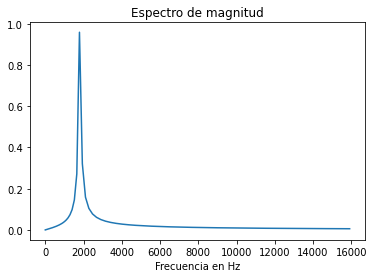

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# =============================================================================
#                   Filtro análogico 
# =============================================================================
#                   Filtor rechaza banda 
#Frecuencia central en Hz

fo = 1800

#Wo 
wo = fo*np.pi*2

Q=20
B=wo/Q

#B = wo/Q donde Q es el factor de calidad 5 < Q <50 
#Númerador de la función de transferencia 
num = [B,0]
#Denominador 
den = [1,B,wo**2]
#Respuesta en frecuencia del filtro analógico 
w, Hw = signal.freqs(num,den)

#Convertir w (rad/seg) a heartz
fhz = w/(2*np.pi)
#Convertir Hw a magnitud
Hwm = np.abs(Hw)
#
plt.figure(1)
plt.plot(fhz,Hwm)
plt.title("Espectro de magnitud")
plt.xlabel("Frecuencia en Hz")





#Cambio a dominio de $Z$
Para hacer el filtro digital, llevarlo al dominio de $z$ habrá que hace una correspondencia entre planos la cual se muestra a continuación: 
<center>
$s=\dfrac{2}{t_s}\dfrac{z-1}{z+1}$


$\left. \dfrac{Bs}{s^2+Bs+ω_0^2}\right|_{s=\dfrac{2}{t_s}\dfrac{z-1}{z+1}}$

$\dfrac{2t_s(t^2-1)}{z^2(4+2Bt_s+\omega_0^2t_s^2)+z(2\omega^2t_s^2-8)+(4-2Bt_s+\omega_0^2t_s^2)}$
</center>





Text(0.5, 0, 'Frecuencia en Hz')

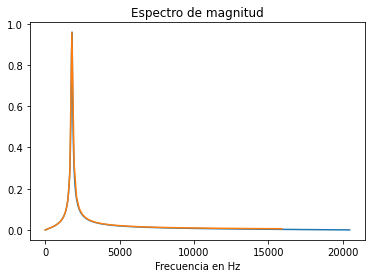

In [ ]:

# =============================================================================
#                   DISEÑO DEL FILTRO DIGITAL
# =============================================================================
#Frecuencia de muestreo en Hz
fs = 41000
#Periodo de muestreo
ts= 1/fs
#Numerador de la función de transferencia de H(z)
#numz=[4+wo**2*ts**2,2*wo**2*ts**2-8,4+wo**2*ts**2]
numz=[2*B*ts,0,-2*B*ts]
#Denominador de la función de transferencia de H(z)
denz=[4+2*B*ts+wo**2*ts**2,2*wo**2*ts**2-8,4-2*B*ts+wo**2*ts**2]
#Respuesta en frecuencia del filtro digital
wz, Hwz = signal.freqz(numz, denz)
#Convierte wz a frecuencia digital o normalizada
F = wz/(2*np.pi)
#Convierte frecuencia digital a Hertz
f =F*fs
#Se obtiene el módulo de Hwz
Hwzm = np.abs (Hwz)
#Gráfico
plt.plot(f,Hwzm)

plt.plot(fhz,Hwm)
plt.title("Espectro de magnitud")
plt.xlabel("Frecuencia en Hz")



#Conclusiones 
El método de "trasnformación de prototipos" puede ser de gran utilidad al diseñar cuando no se conoce sobre filtros analogicos, ya que este parte de un filtro (pasa bajas) en el que se evalua una ecuación para cambiar su comportamiento.